In [2]:
#Librerias:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import BallTree
import seaborn as sns
import os

## Importación de GeoDataFrames

### Importación de GeoDataFrame General (Región Metropolitana):

In [3]:
#1. Definimos las rutas de los archivos .gpkg de las propiedades.
ruta_venta = os.path.join("DB", "Propiedades", "GeoDataFrames Procesados (EDA)", "gdf_venta_metropolitana.gpkg")
ruta_arriendo = os.path.join("DB", "Propiedades", "GeoDataFrames Procesados (EDA)", "gdf_arriendo_metropolitana.gpkg")

#2. Importamos los GeoDataFrames de las propiedades.
gdf_venta = gpd.read_file(ruta_venta)
gdf_arriendo = gpd.read_file(ruta_arriendo)

### Importación GeoDataFrames de Conectividad:

In [4]:
#1. Definimos las rutas de los archivos .gpkg de las paradas.
ruta_metro = os.path.join("DB", "Conectividad y POIs", "Paradas", "paradas_metro.gpkg")
ruta_micro = os.path.join("DB", "Conectividad y POIs", "Paradas", "paradas_micro.gpkg")
ruta_tren = os.path.join("DB", "Conectividad y POIs", "Paradas", "paradas_tren.gpkg")
ruta_bus = os.path.join("DB", "Conectividad y POIs", "Paradas", "paradas_bus.gpkg")

#2. Importamos los GeoDataFrames de las paradas.
gdf_metro = gpd.read_file(ruta_metro)
gdf_micro = gpd.read_file(ruta_micro)
gdf_tren = gpd.read_file(ruta_tren)
gdf_bus = gpd.read_file(ruta_bus)

### Importación GeoDataFrames de Puntos de Interés (POIs):

In [5]:
#1. Definimos las rutas de los archivos .gpkg de los POIs.
ruta_salud = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_salud.gpkg")
ruta_educacion = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_educacion.gpkg")
ruta_comercio_basico = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_comercio_basico.gpkg")
ruta_comercio_retail = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_comercio_retail.gpkg")
ruta_restauracion = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_restauracion.gpkg")
ruta_cultura_ocio = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_cultura_ocio.gpkg")
ruta_servicios_financieros = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_servicios_financieros.gpkg")
ruta_servicios_generales = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_servicios_generales.gpkg")
ruta_seguridad = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_seguridad.gpkg")
ruta_alojamiento = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_alojamiento.gpkg")

#2. Importamos los GeoDataFrames de los POIs.
gdf_salud = gpd.read_file(ruta_salud)
gdf_educacion = gpd.read_file(ruta_educacion)
gdf_comercio_basico = gpd.read_file(ruta_comercio_basico)
gdf_comercio_retail = gpd.read_file(ruta_comercio_retail)
gdf_restauracion = gpd.read_file(ruta_restauracion)
gdf_cultura_ocio = gpd.read_file(ruta_cultura_ocio)
gdf_servicios_financieros = gpd.read_file(ruta_servicios_financieros)
gdf_servicios_generales = gpd.read_file(ruta_servicios_generales)
gdf_seguridad = gpd.read_file(ruta_seguridad)
gdf_alojamiento = gpd.read_file(ruta_alojamiento)

### Importación GeoDataFrames de Uso de Suelo:

In [6]:
#1. Definimos las rutas de los archivos .gpkg de uso de suelo.
ruta_zona_verde_recreacion = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames Suelo", "gdf_zona_verde_recreacion.gpkg")
ruta_zona_comercial_retail = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames Suelo", "gdf_zona_comercial_retail.gpkg")
ruta_zona_residencial = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames Suelo", "gdf_zona_residencial.gpkg")
ruta_zona_industrial = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames Suelo", "gdf_zona_industrial.gpkg")
ruta_zona_agricola = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames Suelo", "gdf_zona_agricola.gpkg")
ruta_zona_servicios_especiales = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames Suelo", "gdf_zona_servicios_especiales.gpkg")

#2. Importamos los GeoDataFrames de uso de suelo.
gdf_zona_verde_recreacion = gpd.read_file(ruta_zona_verde_recreacion)
gdf_zona_comercial_retail = gpd.read_file(ruta_zona_comercial_retail)
gdf_zona_residencial = gpd.read_file(ruta_zona_residencial)
gdf_zona_industrial = gpd.read_file(ruta_zona_industrial)
gdf_zona_agricola = gpd.read_file(ruta_zona_agricola)
gdf_zona_servicios_especiales = gpd.read_file(ruta_zona_servicios_especiales)

### Importación de ShapeFiles:

In [7]:
#1. Definimos las rutas de los ShapeFiles
ruta_comunas = os.path.join("DB", "Conectividad y POIs", "Comunas", "comunas.shp")
ruta_regiones = os.path.join("DB", "Conectividad y POIs", "Regiones", "Regional.shp")

#2. Importamos los ShapeFiles
gdf_comunas = gpd.read_file(ruta_comunas)
gdf_regiones = gpd.read_file(ruta_regiones)

#3. Convertimos el sistema de coordenadas a EPSG:4326
gdf_comunas = gdf_comunas.to_crs(epsg = 4326)
gdf_regiones = gdf_regiones.to_crs(epsg = 4326)

## EDA
A continuación, se da inicio al proceso de EDA para establecer relaciones entre los distintos atributos de cada propiedad.

In [8]:
#1. Creamos una nueva columna en gdf_venta y gdf_arriendo indicando si se trata de una propiedad en venta o en arriendo.
gdf_venta["Transaccion"] = "Venta"
gdf_arriendo["Transaccion"] = "Arriendo"

#2. Unimos ambos GeoDataFrames en uno solo.
gdf_propiedades = pd.concat([gdf_venta, gdf_arriendo], ignore_index = True)

### Análisis Descriptivo:
El objetivo es obtener una visión rápida de la calidad y el contenido de los GeoDataFrames de propiedades.

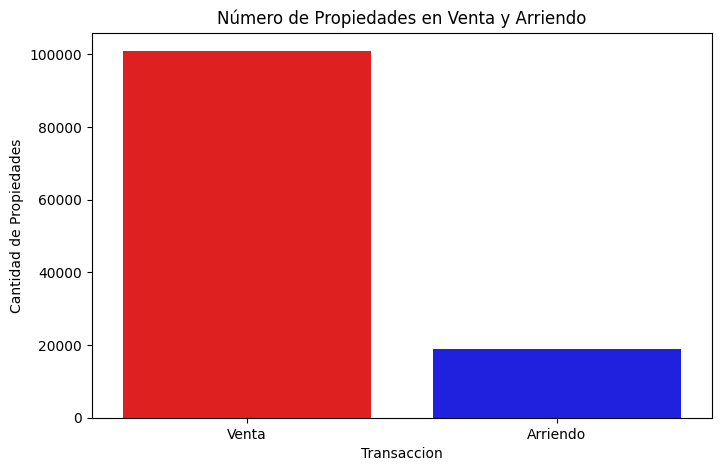

In [9]:
#1. Número de propiedades en venta y arriendo a partir del GeoDataFrame unificado.
plt.figure(figsize = (8,5))
sns.countplot(data = gdf_propiedades, x = "Transaccion", hue = "Transaccion", palette = ["red", "blue"], legend = False)
plt.title('Número de Propiedades en Venta y Arriendo')
plt.ylabel('Cantidad de Propiedades')
plt.show()

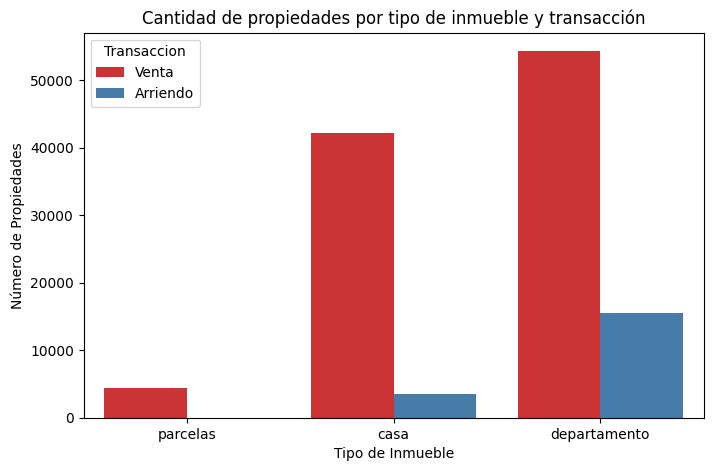

In [10]:
#1. Grafico de barras que muestra el número de propiedades segun el tipo de inmueble.
plt.figure(figsize = (8,5))
sns.countplot(data= gdf_propiedades, x = "inmueble", hue = "Transaccion", palette = "Set1")
plt.title("Cantidad de propiedades por tipo de inmueble y transacción")
plt.xlabel("Tipo de Inmueble")
plt.ylabel("Número de Propiedades")
plt.show()

### Análisis Univariable:
Para llevar a cabo el análisis univariables será necesario eliminar los Outliers de nuestro GeoDataFrame.

In [11]:
#1. Eliminamos los Outliers del GeoDataFrame unificado tomando desde el percentil 1 al percentil 99 en las columnas "Superficie total" y "$".
q_inf = gdf_propiedades["Superficie total"].quantile(0.01)
q_sup = gdf_propiedades["Superficie total"].quantile(0.99)
gdf_propiedades = gdf_propiedades[(gdf_propiedades["Superficie total"] > q_inf) & (gdf_propiedades["Superficie total"] < q_sup)]

q_inf_precio = gdf_propiedades["$"].quantile(0.01)
q_sup_precio = gdf_propiedades["$"].quantile(0.99)
gdf_propiedades = gdf_propiedades[(gdf_propiedades["$"] > q_inf_precio) & (gdf_propiedades["$"] < q_sup_precio)]

#2. Eliminamos los valores nulos en las columnas "Superficie total" y "$".
gdf_propiedades = gdf_propiedades.dropna(subset = ["Superficie total", "$"])

#3. Reiniciamos el índice del GeoDataFrame.
gdf_propiedades = gdf_propiedades.reset_index(drop = True)  

#4. Filtramos las propiedades cuya unidad de medida sea m².
gdf_propiedades = gdf_propiedades[gdf_propiedades["Superficie total unidad"] == "m²"]

#### Distribución de Precios:

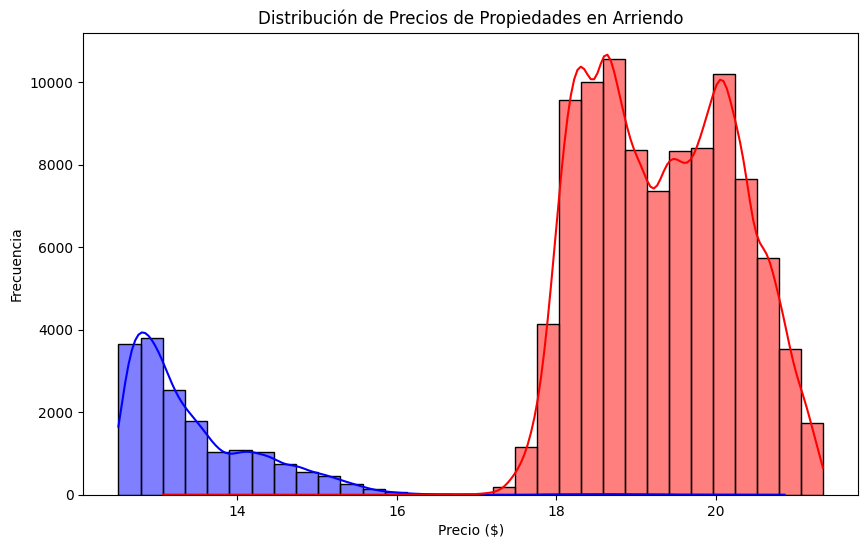

In [12]:
#1. Graficamos la distribución de precios de las propiedades en arriendo GeoDataFrame unificado.
plt.figure(figsize = (10,6))
sns.histplot(data = gdf_propiedades[gdf_propiedades["Transaccion"] == "Arriendo"], x = "$_log", bins = 30, kde = True, color = "blue")
sns.histplot(data = gdf_propiedades[gdf_propiedades["Transaccion"] == "Venta"], x = "$_log", bins = 30, kde = True, color = "red")

plt.title('Distribución de Precios de Propiedades en Arriendo')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.show()

#### Distribución de Superficie:

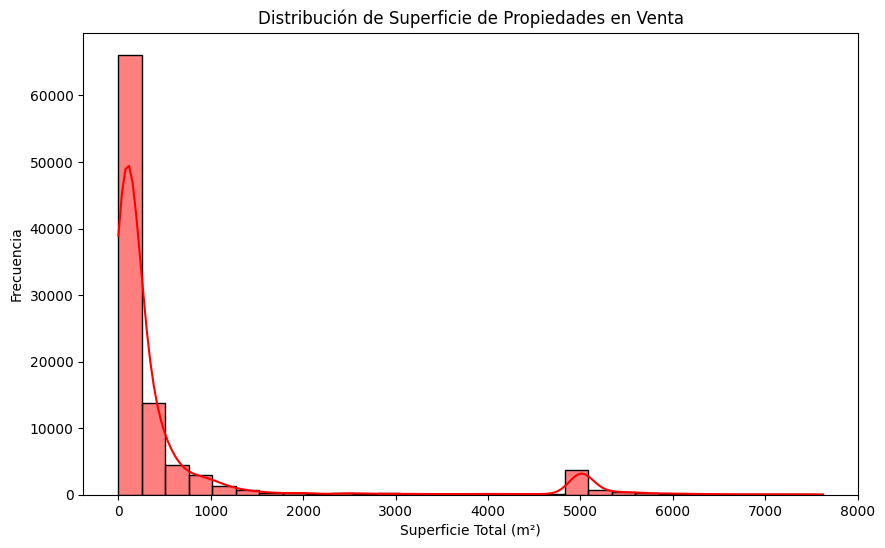

In [13]:
#1. Graficamos la distribución de superficie de las propiedades en venta GeoDataFrame unificado.
plt.figure(figsize = (10,6))
sns.histplot(data = gdf_propiedades[gdf_propiedades["Transaccion"] == "Venta"], x = "Superficie total", bins = 30, kde = True, color = "red")
plt.title('Distribución de Superficie de Propiedades en Venta')
plt.xlabel('Superficie Total (m²)')
plt.ylabel('Frecuencia')
plt.show()

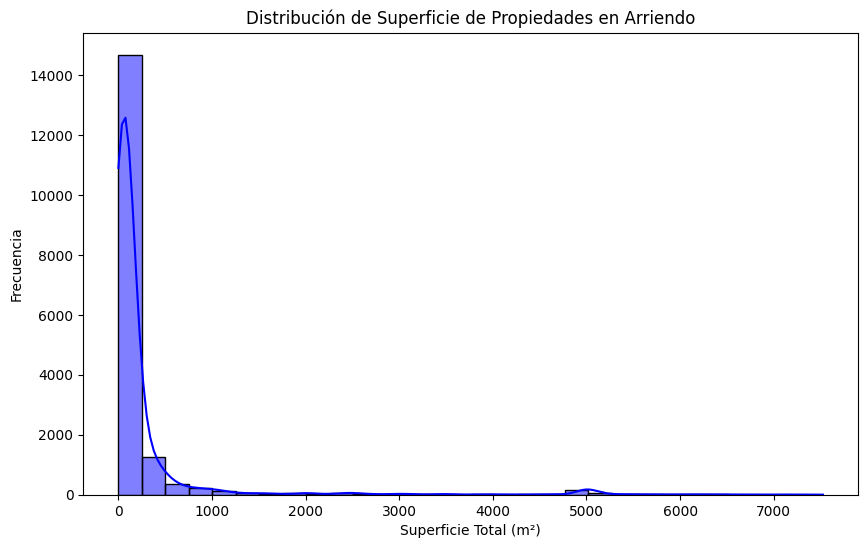

In [14]:
#1. Graficamos la distribución de superficie de las propiedades en arriendo GeoDataFrame unificado.
plt.figure(figsize = (10,6))
sns.histplot(data = gdf_propiedades[gdf_propiedades["Transaccion"] == "Arriendo"], x = "Superficie total", bins = 30, kde = True, color = "blue")
plt.title('Distribución de Superficie de Propiedades en Arriendo')
plt.xlabel('Superficie Total (m²)')
plt.ylabel('Frecuencia')
plt.show()

### Análisis Geoespacial:

### Mapa de Providencia
A modo de ejemplo, llevemos a un mapa las propiedadees tanto en venta como en arriendo dentro de la comuna de Providencia, junto con los puntos de restauración, las paradas de micro y las áreas verdes.

/var/folders/ys/xjks67y52rd1qq7hq_hrmjq00000gn/T/ipykernel_80180/1931054790.py:30: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


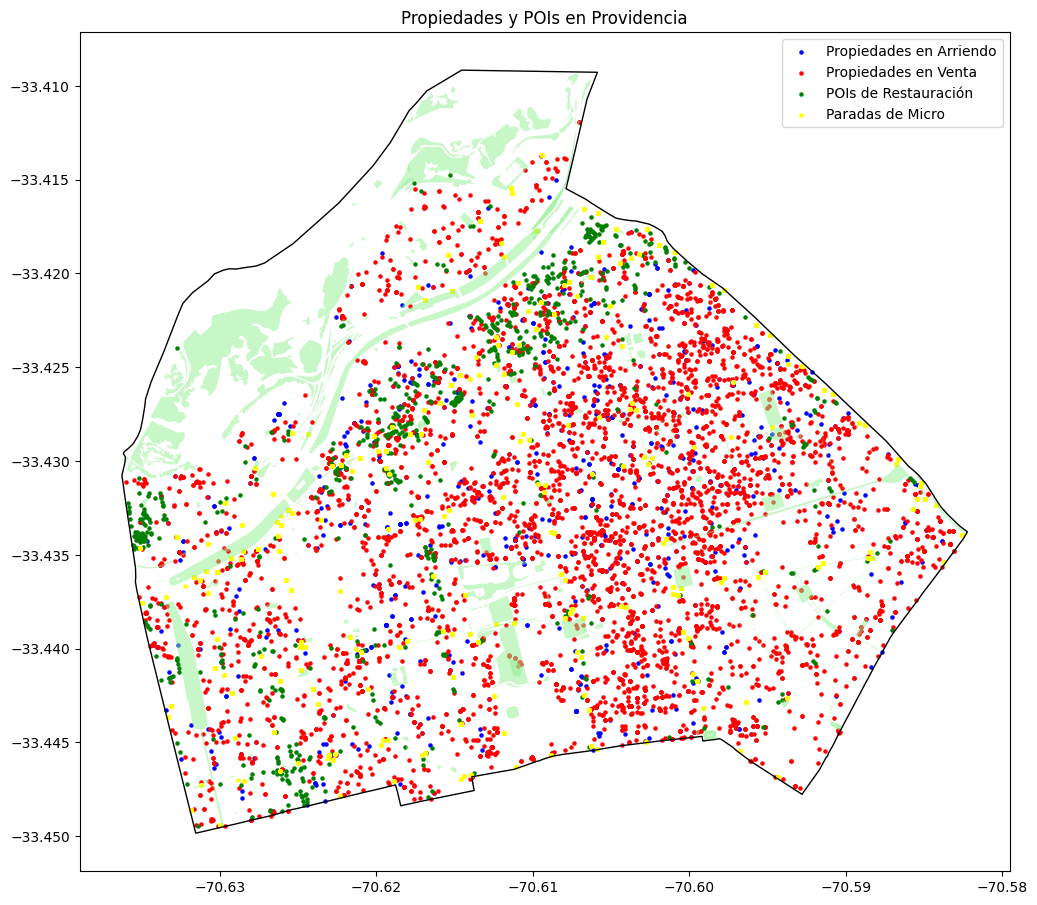

In [15]:
#1. Definimos el ShapeFile de la comuna de Providencia
comuna_providencia = gdf_comunas[gdf_comunas["Comuna"] == 'Providencia']

#2. Filtramos las propiedades en arriendo que están dentro de la comuna de Providencia.
propiedades_arriendo_providencia = gpd.sjoin(gdf_arriendo, comuna_providencia, how = "inner", predicate = 'within')

#3. Filtramos las propiedades en venta que están dentro de la comuna de Providencia.
propiedades_venta_providencia = gpd.sjoin(gdf_venta, comuna_providencia, how = "inner", predicate = 'within')

#4. Filtramos los POIs de restauración que están dentro de la comuna de Providencia.
pois_restauracion_providencia = gpd.sjoin(gdf_restauracion, comuna_providencia, how = "inner", predicate = 'within')

#5. Filtramos las paradas de micro que están dentro de la comuna de Providencia.
paradas_micro_providencia = gpd.sjoin(gdf_micro, comuna_providencia, how = "inner", predicate = 'within')

#6. Filtramos las áreas verdes que están dentro de la comuna de Providencia.
areas_verdes_providencia = gpd.sjoin(gdf_zona_verde_recreacion, comuna_providencia, how = "inner", predicate = 'within')

#7. Graficamos los datos filtrados.
fig, ax = plt.subplots(figsize = (12,12))

comuna_providencia.boundary.plot(ax = ax, color = "black", linewidth = 1)
propiedades_arriendo_providencia.plot(ax = ax, color = "blue", markersize = 5, label = "Propiedades en Arriendo")
propiedades_venta_providencia.plot(ax = ax, color = "red", markersize = 5, label = "Propiedades en Venta")
pois_restauracion_providencia.plot(ax = ax, color = "green", markersize = 5, label = "POIs de Restauración")
paradas_micro_providencia.plot(ax = ax, color = "yellow", markersize = 5, label = "Paradas de Micro")
areas_verdes_providencia.plot(ax = ax, color = "lightgreen", alpha = 0.5, label = "Áreas Verdes")

plt.title('Propiedades y POIs en Providencia')
plt.legend()
plt.show()

### Análisis Multivariable

* ¿Existe una relación entre el precio de una propiedad y su proximidad a POIs de salud?

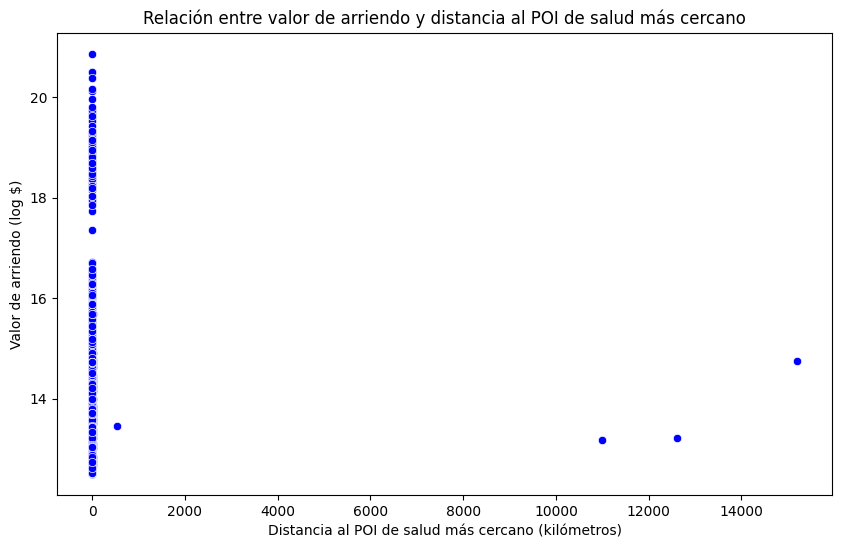

In [16]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = gdf_propiedades[gdf_propiedades["Transaccion"] == "Arriendo"], x = "salud_mas_cercano_km", y = "$_log", color = "blue")
plt.title('Relación entre valor de arriendo y distancia al POI de salud más cercano')
plt.xlabel('Distancia al POI de salud más cercano (kilómetros)')
plt.ylabel('Valor de arriendo (log $)')
plt.show()

* ¿Existe alguna relación entre el valor de compra de una propiedad y el número de POIs de seguridad a un radio de 500m?

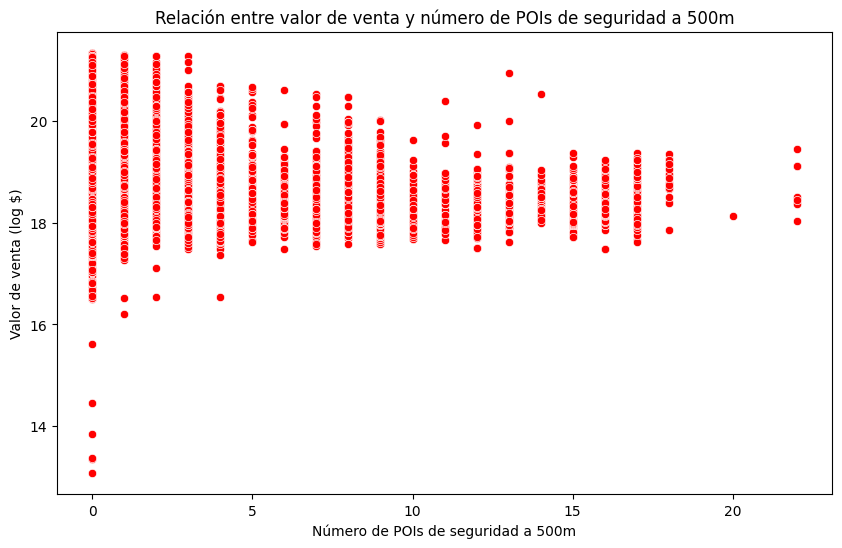

In [17]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = gdf_propiedades[gdf_propiedades["Transaccion"] == "Venta"], x = "puntos_seguridad_500m", y = "$_log", color = "red")
plt.title('Relación entre valor de venta y número de POIs de seguridad a 500m')
plt.xlabel('Número de POIs de seguridad a 500m')
plt.ylabel('Valor de venta (log $)')
plt.show()

## Predictor
A continuación, diseñaremos un algoritmo capaz de predecir el valor de una propiedad, tanto en venta como en arriendo.


In [18]:
#1. Creamos una copia del GeoDataFrame unificado de propiedades para las propiedades en venta.
gdf_venta_modelo = gdf_propiedades[gdf_propiedades["Transaccion"] == "Venta"].copy()

#2. Creamos una copia del GeoDataFrame unificado de propiedades para las propiedades en arriendo.
gdf_arriendo_modelo = gdf_propiedades[gdf_propiedades["Transaccion"] == "Arriendo"].copy()

#3. Para el caso de las propiedades en arriendo, eliminaremos los outliers en la columna "$_log".
q_inf_arriendo = gdf_arriendo_modelo["$_log"].quantile(0.01)
q_sup_arriendo = gdf_arriendo_modelo["$_log"].quantile(0.99)
gdf_arriendo_modelo = gdf_arriendo_modelo[(gdf_arriendo_modelo["$_log"] > q_inf_arriendo) & (gdf_arriendo_modelo["$_log"] < q_sup_arriendo)]

### Codificación de columnas categóricas:

In [19]:
#1. Definimos nuestra matriz de atributos (X).
matriz = [
    # Columnas originales
    "Superficie total", "Dormitorios", "Baños",
    # Columnas de conectividad
    "puntos_metro_500m", "metro_mas_cercano_km",
    "puntos_micro_500m", "micro_mas_cercano_km",
    "puntos_tren_500m", "tren_mas_cercano_km",
    "puntos_bus_500m", "bus_mas_cercano_km",
    # Columnas de POIs
    "puntos_salud_500m", "salud_mas_cercano_km",
    "puntos_educacion_500m", "educacion_mas_cercano_km",
    "puntos_comercio_basico_500m", "comercio_basico_mas_cercano_km",
    "puntos_comercio_retail_500m", "comercio_retail_mas_cercano_km",
    "puntos_restauracion_500m", "restauracion_mas_cercano_km",
    "puntos_cultura_ocio_500m", "cultura_ocio_mas_cercano_km",
    "puntos_servicios_financieros_500m", "servicios_financieros_mas_cercano_km",
    "puntos_servicios_generales_500m", "servicios_generales_mas_cercano_km",
    "puntos_seguridad_500m", "seguridad_mas_cercano_km",
    "puntos_alojamiento_500m", "alojamiento_mas_cercano_km",
    # Columnas de Zonas
    "zona_verde_recreacion_mas_cercana_km",
    "zona_comercial_retail_mas_cercana_km",
    "zona_residencial_mas_cercana_km",
    "zona_industrial_mas_cercana_km",
    "zona_agricola_mas_cercana_km",
    "zona_servicios_especiales_mas_cercana_km"
]

#2. Preparamos X (Features)
X_venta = gdf_venta_modelo[matriz]
dummies_venta = pd.get_dummies(gdf_venta_modelo["inmueble"], drop_first = True)
X_venta = pd.concat([X_venta, dummies_venta], axis = 1)

X_arriendo = gdf_arriendo_modelo[matriz]
dummies_arriendo = pd.get_dummies(gdf_arriendo_modelo["inmueble"], drop_first = True)
X_arriendo = pd.concat([X_arriendo, dummies_arriendo], axis = 1)

#3. Usamos el precio logarítmico como nuestra etiqueta a predecir (y) para mejorar la convergencia del modelo.
y_venta = gdf_venta_modelo["$_log"]
y_arriendo = gdf_arriendo_modelo["$_log"]

### División de Datos:

In [20]:
#1. Dividimos los datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split
X_train_venta, X_test_venta, y_train_venta, y_test_venta = train_test_split(X_venta, y_venta, test_size = 0.3, random_state = 0)
X_train_arriendo, X_test_arriendo, y_train_arriendo, y_test_arriendo = train_test_split(X_arriendo, y_arriendo, test_size = 0.3, random_state = 0)

### Normalización de Datos:

In [21]:
#1. Normalizamos los datos numéricos.
from sklearn.preprocessing import StandardScaler
escala = StandardScaler()

# Columnas numéricas a escalar (las mismas de tu lista 'matriz' original)
columnas_a_normalizar = matriz 

# CRÍTICO: Hacemos copias para trabajar seguros
X_train_scaled_venta = X_train_venta.copy()
X_test_scaled_venta = X_test_venta.copy()

X_train_scaled_arriendo = X_train_arriendo.copy()
X_test_scaled_arriendo = X_test_arriendo.copy()

# Aplicamos la escala SOLO en las columnas numéricas.
# El resto (las dummies de inmuebles) se quedan como 0 y 1 intactos.
X_train_scaled_venta[columnas_a_normalizar] = escala.fit_transform(X_train_venta[columnas_a_normalizar])
X_test_scaled_venta[columnas_a_normalizar] = escala.transform(X_test_venta[columnas_a_normalizar])

X_train_scaled_arriendo[columnas_a_normalizar] = escala.fit_transform(X_train_arriendo[columnas_a_normalizar])
X_test_scaled_arriendo[columnas_a_normalizar] = escala.transform(X_test_arriendo[columnas_a_normalizar])

## Creación y Entrenamiento de Modelo Random Forest
Elegimos Random Forest porque es el algoritmo más robusto para capturar la complejidad real del mercado inmobiliario, ya que detecta patrones no lineales que la regresión lineal ignora. A diferencia del kNN, no pierde precisión al manejar muchas variables de conectividad, y supera a los árboles de decisión simples al evitar el sobreajuste mediante el promedio de múltiples árboles. Además, es capaz de entregarnos la importancia exacta de cada variable, explicando no solo cuánto vale una propiedad, sino por qué.

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Instanciamos el modelo
rf_modelo_venta = RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs =-1)
rf_modelo_arriendo = RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs =-1)

In [23]:
print("Entrenando Random Forest para propiedades en venta")

# Entrenamos
rf_modelo_venta.fit(X_train_scaled_venta, y_train_venta)

# Predecimos (obtenemos valores en escala Logarítmica)
y_pred_log_venta = rf_modelo_venta.predict(X_test_scaled_venta)

Entrenando Random Forest para propiedades en venta


In [24]:
print("Entrenando Random Forest para propiedades en arriendo")

# Entrenamos
rf_modelo_arriendo.fit(X_train_scaled_arriendo, y_train_arriendo)

# Predecimos (obtenemos valores en escala Logarítmica)
y_pred_log_arriendo = rf_modelo_arriendo.predict(X_test_scaled_arriendo)

Entrenando Random Forest para propiedades en arriendo


In [25]:
# Importamos las métricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Invertimos el logaritmo (esto ya lo tenías bien)
y_test_real_venta = np.expm1(y_test_venta)
y_pred_real_venta = np.expm1(y_pred_log_venta)

y_test_real_arriendo = np.expm1(y_test_arriendo)
y_pred_real_arriendo = np.expm1(y_pred_log_arriendo)

# 2. Calculamos las métricas (CORREGIDO)
r2_venta = r2_score(y_test_real_venta, y_pred_real_venta)
r2_arriendo = r2_score(y_test_real_arriendo, y_pred_real_arriendo)

# Calculamos el MSE primero (sin el parámetro squared)
mse_venta = mean_squared_error(y_test_real_venta, y_pred_real_venta)
mse_arriendo = mean_squared_error(y_test_real_arriendo, y_pred_real_arriendo)

# Y obtenemos el RMSE sacando la raíz cuadrada manualmente
rmse_venta = np.sqrt(mse_venta) 
rmse_arriendo = np.sqrt(mse_arriendo)

mae_venta = mean_absolute_error(y_test_real_venta, y_pred_real_venta)
mae_arriendo = mean_absolute_error(y_test_real_arriendo, y_pred_real_arriendo)

# 3. Imprimimos resultados
print("RESULTADOS DEL RANDOM FOREST - VENTA:")
print(f"R2 Score: {r2_venta:.4f}")
print(f"Error Medio Absoluto (MAE): ${mae_venta:,.0f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): ${rmse_venta:,.0f}")
print("-" * 50)
print("RESULTADOS DEL RANDOM FOREST - ARRIENDO:")
print(f"R2 Score: {r2_arriendo:.4f}")
print(f"Error Medio Absoluto (MAE): ${mae_arriendo:,.0f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): ${rmse_arriendo:,.0f}")

RESULTADOS DEL RANDOM FOREST - VENTA:
R2 Score: 0.9296
Error Medio Absoluto (MAE): $44,894,780
Raíz del Error Cuadrático Medio (RMSE): $90,548,281
--------------------------------------------------
RESULTADOS DEL RANDOM FOREST - ARRIENDO:
R2 Score: 0.8787
Error Medio Absoluto (MAE): $156,771
Raíz del Error Cuadrático Medio (RMSE): $362,747


## Variables más relevantes

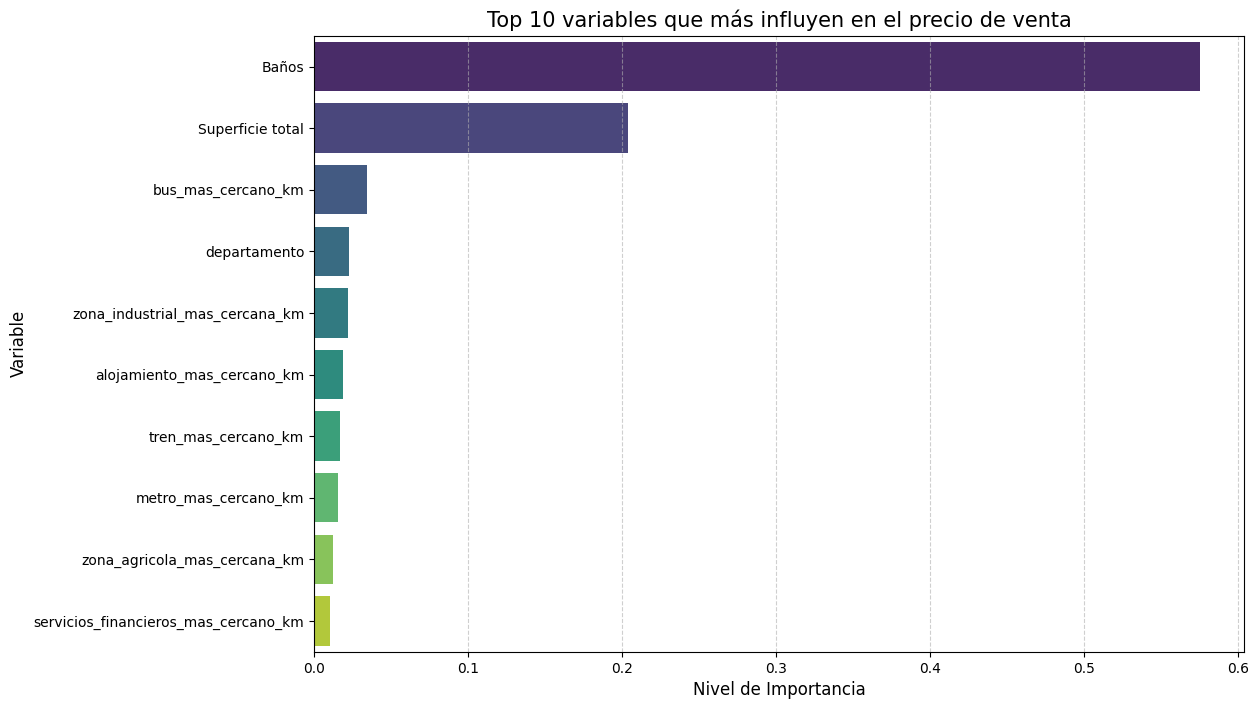

In [26]:
# 1. Extraemos la importancia de cada variable del modelo entrenado.
importancias = rf_modelo_venta.feature_importances_
variables = X_venta.columns

# 2. Creamos un DataFrame para ordenarlos fácilmente.
df_importancia_venta = pd.DataFrame({
    'Variable': variables,
    'Importancia': importancias
})

# 3. Ordenamos de mayor a menor importancia.
df_importancia_venta = df_importancia_venta.sort_values(by = "Importancia", ascending = False)

# 4. Graficamos el Top 10.
plt.figure(figsize = (12, 8))

sns.barplot(
    data = df_importancia_venta.head(10),
    x = "Importancia", 
    y = "Variable", 
    hue = "Variable",
    legend = False,
    palette = "viridis"
)

plt.title("Top 10 variables que más influyen en el precio de venta", fontsize = 15)
plt.xlabel("Nivel de Importancia", fontsize = 12)
plt.ylabel("Variable", fontsize = 12)
plt.grid(axis = "x", linestyle = '--', alpha = 0.6)

plt.show()

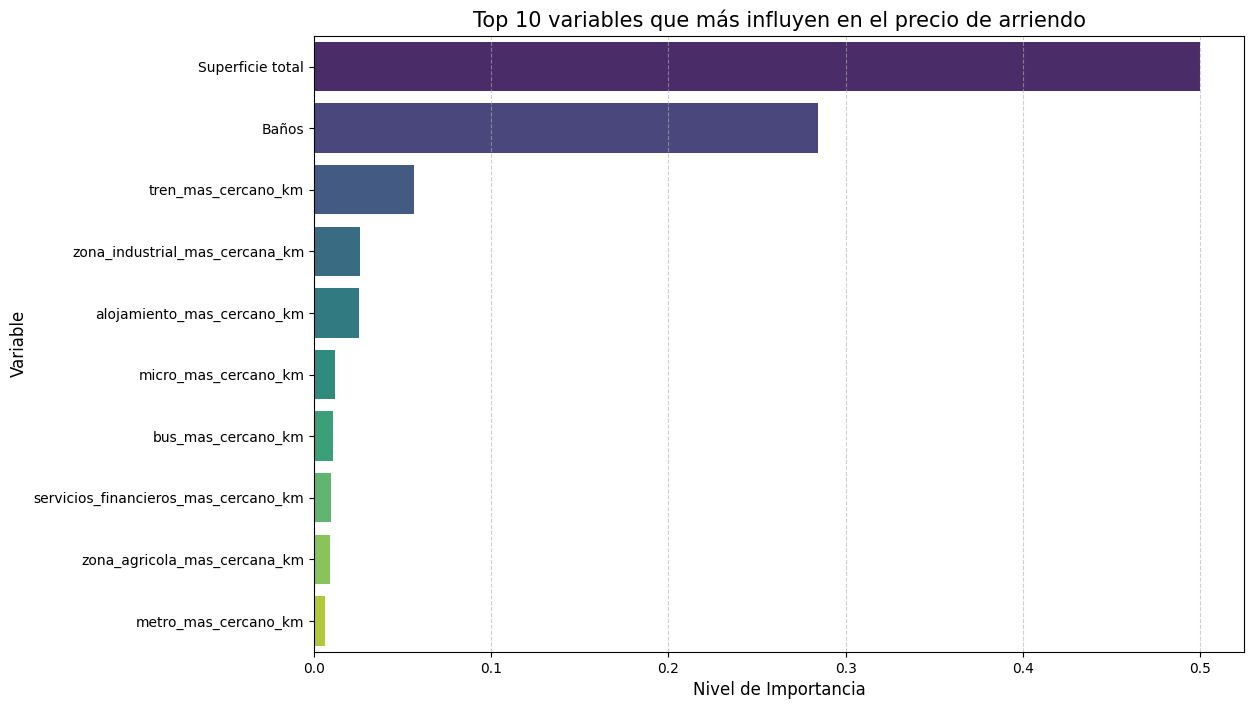

In [27]:
# 1. Extraemos la importancia de cada variable del modelo entrenado.
importancias = rf_modelo_arriendo.feature_importances_
variables = X_arriendo.columns

# 2. Creamos un DataFrame para ordenarlos fácilmente.
df_importancia_arriendo = pd.DataFrame({
    'Variable': variables,
    'Importancia': importancias
})

# 3. Ordenamos de mayor a menor importancia.
df_importancia_arriendo = df_importancia_arriendo.sort_values(by = "Importancia", ascending = False)

# 4. Graficamos el Top 10.
plt.figure(figsize = (12, 8))

# Usamos una paleta de colores degradada para resaltar los primeros
sns.barplot(
    data = df_importancia_arriendo.head(10),
    x = "Importancia", 
    y = "Variable",
    hue = "Variable",
    legend = False,
    palette = "viridis"
)

plt.title("Top 10 variables que más influyen en el precio de arriendo", fontsize = 15)
plt.xlabel("Nivel de Importancia", fontsize = 12)
plt.ylabel("Variable", fontsize = 12)
plt.grid(axis = "x", linestyle = '--', alpha = 0.6)

plt.show()

## POIs más relevantes

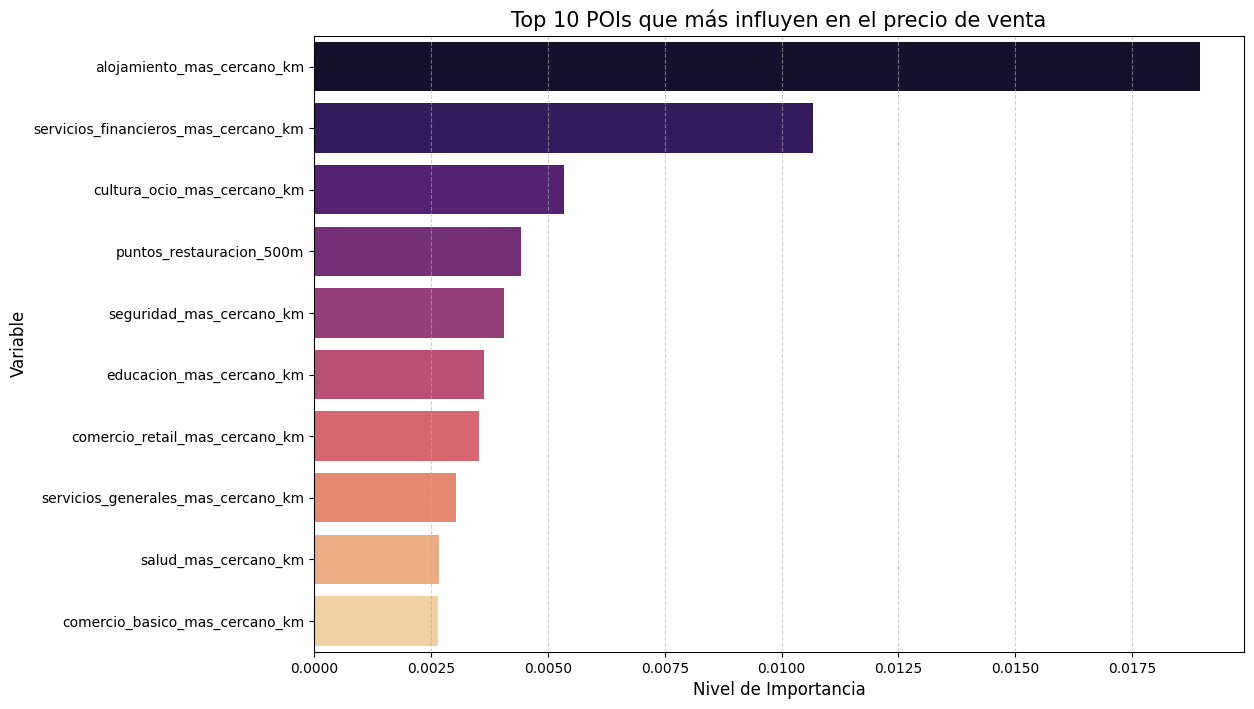

In [28]:
# 1. Definimos las palabras clave para identificar POIs
keywords_pois = [
    "salud", "educacion", "comercio", "restauracion", 
    "cultura", "financieros", "generales", "seguridad", "alojamiento"
]

# 2. Filtramos el DataFrame de importancia usando esas palabras clave
mascara_pois_venta = df_importancia_venta["Variable"].apply(lambda x: any(k in x for k in keywords_pois))
df_pois_venta = df_importancia_venta[mascara_pois_venta].sort_values(by = "Importancia", ascending = False)

# 3. Graficamos el Top 10 de POIs
plt.figure(figsize = (12, 8))

sns.barplot(
    data = df_pois_venta.head(10), 
    x = "Importancia", 
    y = "Variable",
    hue = "Variable",
    legend = False,
    palette = "magma"
)

plt.title("Top 10 POIs que más influyen en el precio de venta", fontsize = 15)
plt.xlabel("Nivel de Importancia", fontsize = 12)
plt.ylabel("Variable", fontsize = 12)
plt.grid(axis = "x", linestyle = "--", alpha = 0.6)

plt.show()

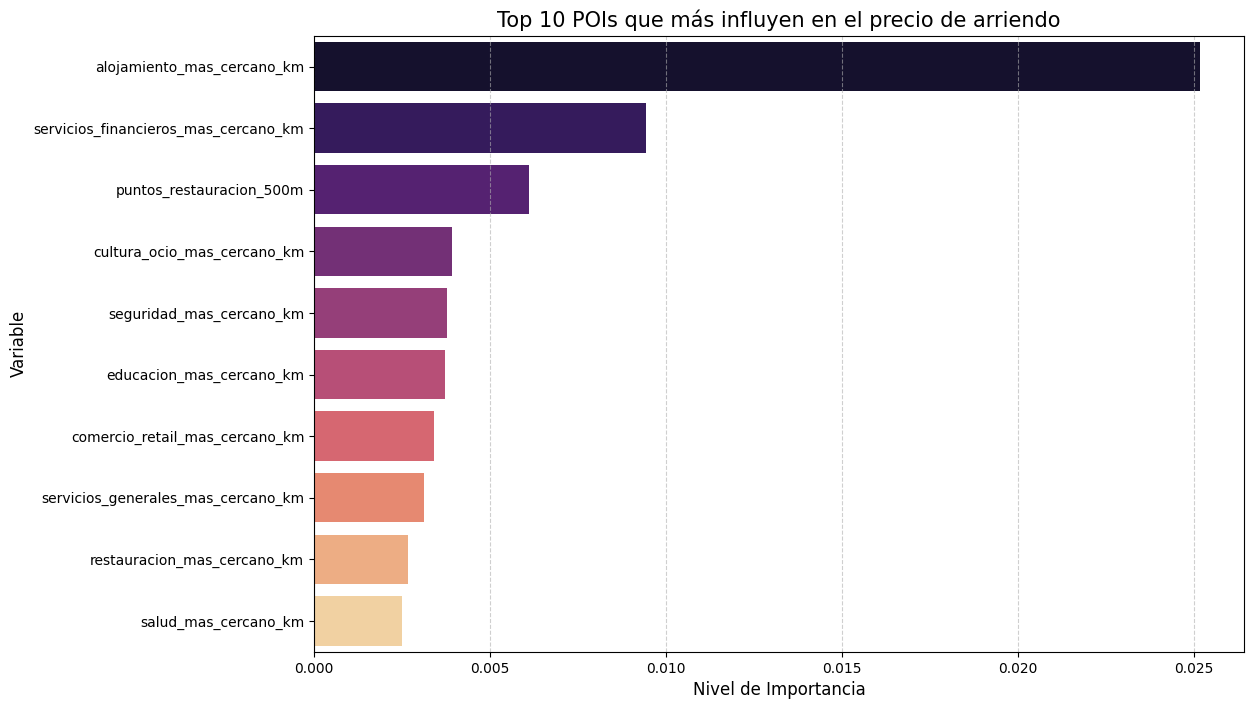

In [29]:
# 1. Definimos las palabras clave para identificar POIs
keywords_pois = [
    "salud", "educacion", "comercio", "restauracion", 
    "cultura", "financieros", "generales", "seguridad", "alojamiento"
]

# 2. Filtramos el DataFrame de importancia usando esas palabras clave
mascara_pois_arriendo = df_importancia_arriendo["Variable"].apply(lambda x: any(k in x for k in keywords_pois))
df_pois_arriendo = df_importancia_arriendo[mascara_pois_arriendo].sort_values(by = "Importancia", ascending = False)

# 3. Graficamos el Top 10 de POIs
plt.figure(figsize = (12, 8))

sns.barplot(
    data = df_pois_arriendo.head(10), 
    x = "Importancia", 
    y = "Variable",
    hue = "Variable",
    legend = False,
    palette = "magma"
)

plt.title("Top 10 POIs que más influyen en el precio de arriendo", fontsize = 15)
plt.xlabel("Nivel de Importancia", fontsize = 12)
plt.ylabel("Variable", fontsize = 12)
plt.grid(axis = "x", linestyle = "--", alpha = 0.6)

plt.show()

## Tipo de Conectividad más Relevante

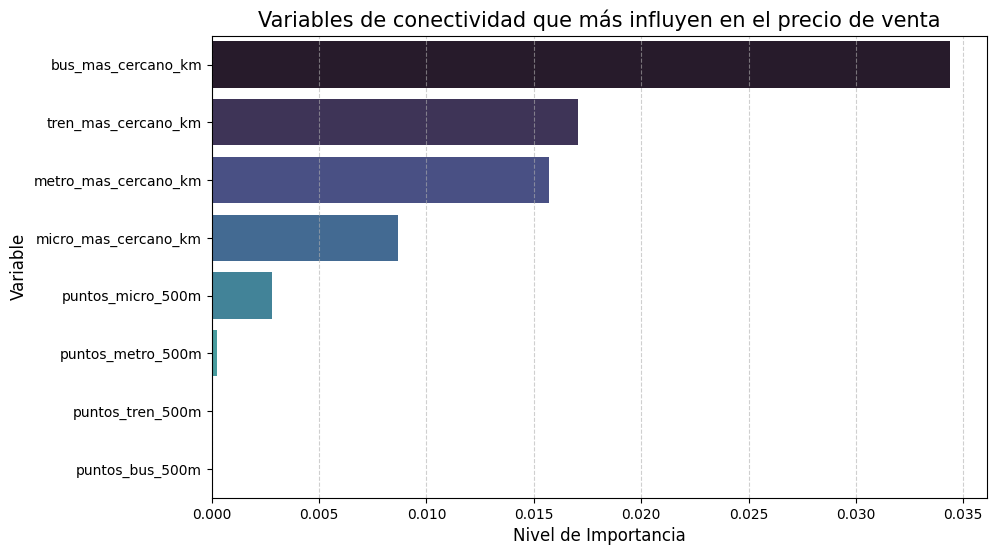

In [30]:
# 1. Definimos las palabras clave de transporte
keywords_transporte = ["metro", "micro", "tren", "bus"]

# 2. Filtramos las variables de transporte
mascara_transporte_venta = df_importancia_venta["Variable"].apply(lambda x: any(k in x for k in keywords_transporte))
df_transporte_venta = df_importancia_venta[mascara_transporte_venta].sort_values(by = "Importancia", ascending = False)

# 3. Graficamos
plt.figure(figsize = (10, 6))

sns.barplot(
    data = df_transporte_venta, 
    x = "Importancia", 
    y = "Variable", 
    hue = "Variable",
    legend = False,
    palette = "mako"
)

plt.title("Variables de conectividad que más influyen en el precio de venta", fontsize = 15)
plt.xlabel("Nivel de Importancia", fontsize = 12)
plt.ylabel("Variable", fontsize = 12)
plt.grid(axis = "x", linestyle = "--", alpha = 0.6)

plt.show()

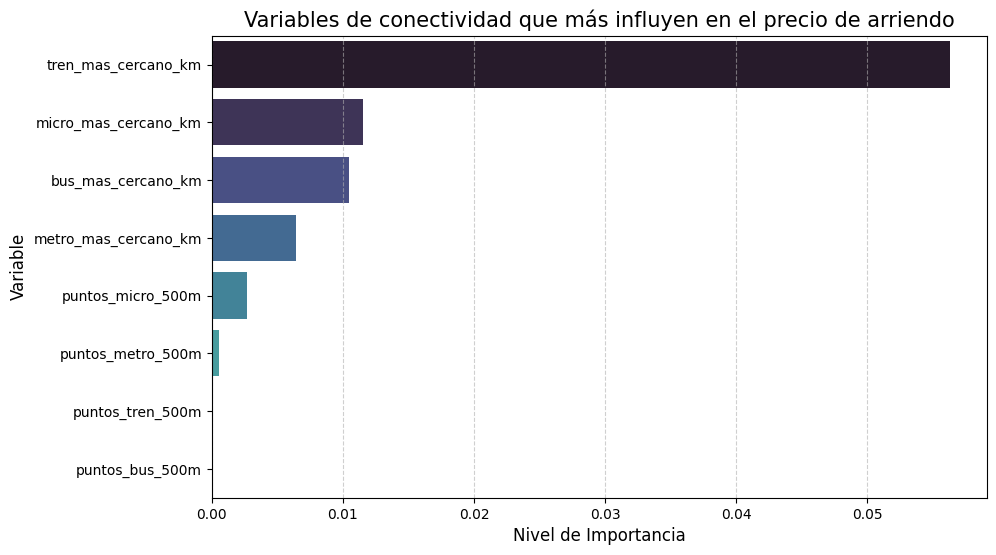

In [31]:
# 1. Definimos las palabras clave de transporte
keywords_transporte = ["metro", "micro", "tren", "bus"]

# 2. Filtramos las variables de transporte
mascara_transporte_arriendo = df_importancia_arriendo["Variable"].apply(lambda x: any(k in x for k in keywords_transporte))
df_transporte_arriendo = df_importancia_arriendo[mascara_transporte_arriendo].sort_values(by = "Importancia", ascending = False)

# 3. Graficamos
plt.figure(figsize = (10, 6))

sns.barplot(
    data = df_transporte_arriendo, 
    x = "Importancia", 
    y = "Variable", 
    hue = "Variable",
    legend = False,
    palette = "mako"
)

plt.title("Variables de conectividad que más influyen en el precio de arriendo", fontsize = 15)
plt.xlabel("Nivel de Importancia", fontsize = 12)
plt.ylabel("Variable", fontsize = 12)
plt.grid(axis = "x", linestyle = "--", alpha = 0.6)

plt.show()

## Tipo de Suelo más Relevante


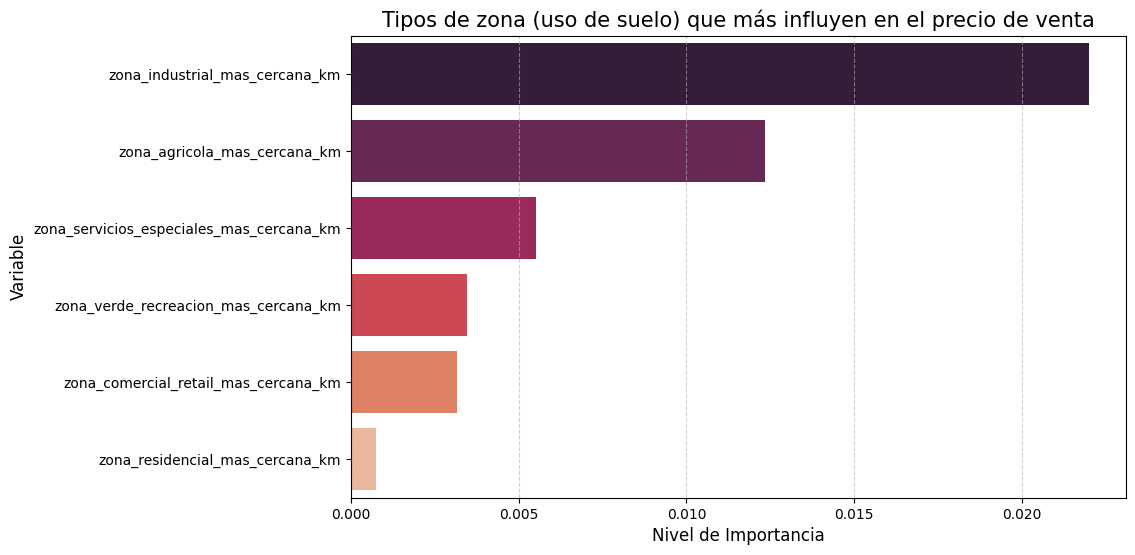

In [32]:
# 1. Definimos la palabra clave para zonas
keywords_zonas = ["zona"]

# 2. Filtramos las variables de zona
mascara_zonas_venta = df_importancia_venta["Variable"].apply(lambda x: any(k in x for k in keywords_zonas))
df_zonas_venta = df_importancia_venta[mascara_zonas_venta].sort_values(by = "Importancia", ascending = False)

# 3. Graficamos
plt.figure(figsize = (10, 6))

sns.barplot(
    data = df_zonas_venta, 
    x = "Importancia", 
    y = "Variable", 
    hue = "Variable",
    legend = False,
    palette = "rocket"
)

plt.title("Tipos de zona (uso de suelo) que más influyen en el precio de venta", fontsize = 15)
plt.xlabel("Nivel de Importancia", fontsize = 12)
plt.ylabel("Variable", fontsize = 12)
plt.grid(axis = "x", linestyle = "--", alpha = 0.6)

plt.show()

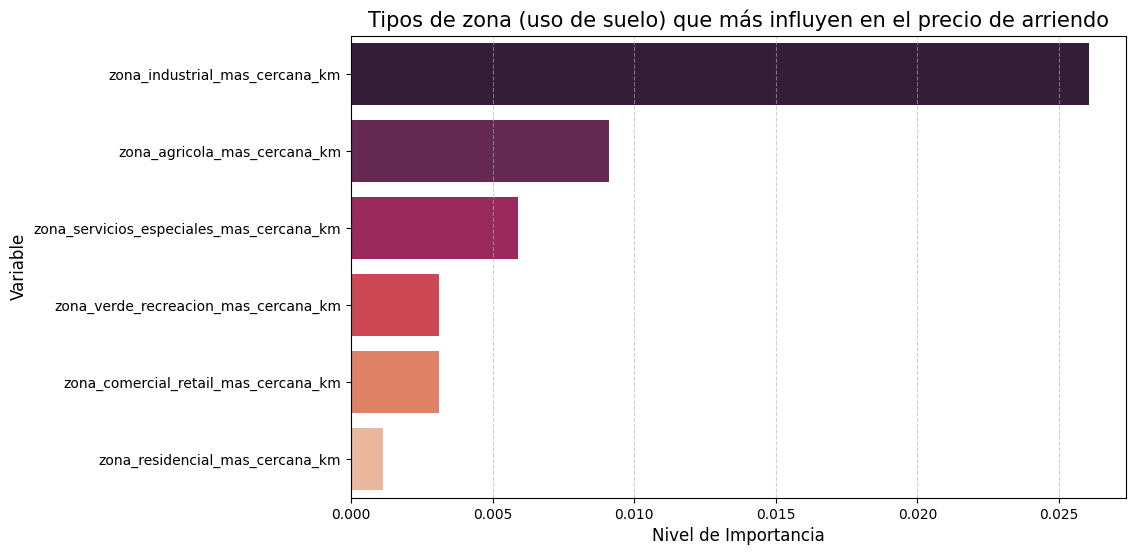

In [33]:
# 1. Definimos la palabra clave para zonas
keywords_zonas = ["zona"]

# 2. Filtramos las variables de zona
mascara_zonas_arriendo = df_importancia_arriendo["Variable"].apply(lambda x: any(k in x for k in keywords_zonas))
df_zonas_arriendo = df_importancia_arriendo[mascara_zonas_arriendo].sort_values(by = "Importancia", ascending = False)

# 3. Graficamos
plt.figure(figsize = (10, 6))

sns.barplot(
    data = df_zonas_arriendo, 
    x = "Importancia", 
    y = "Variable", 
    hue = "Variable",
    legend = False,
    palette = "rocket"
)

plt.title("Tipos de zona (uso de suelo) que más influyen en el precio de arriendo", fontsize = 15)
plt.xlabel("Nivel de Importancia", fontsize = 12)
plt.ylabel("Variable", fontsize = 12)
plt.grid(axis = "x", linestyle = "--", alpha = 0.6)

plt.show()

## Dirección de Influencia - Propiedades en Venta

In [34]:
#1. Función auxiliar para graficar.
def graficar_subgrupo(X_train, y_train, columnas, titulo):

    # Preparamos datos
    df_analisis = X_train[columnas].copy()
    df_analisis["Precio_Real"] = np.expm1(y_train)

    # Calculamos correlación Spearman
    correlaciones = df_analisis.corr(method = "spearman")["Precio_Real"].drop("Precio_Real")
    correlaciones = correlaciones.loc[correlaciones.abs().sort_values(ascending = False).index]

    # Graficamos
    plt.figure(figsize = (10, 6))
    colores = ["green" if x > 0 else "red" for x in correlaciones.values]
    
    sns.barplot(x = correlaciones.values, y = correlaciones.index, hue = correlaciones.index, legend = False, palette = colores)
    
    plt.axvline(0, color = "black", linewidth = 1)
    plt.title(titulo, fontsize = 14)
    plt.xlabel("Correlación (Izquierda: Baja el Precio | Derecha: Sube el Precio)", fontsize = 12)
    plt.ylabel("")
    plt.grid(axis = "x", linestyle = "--", alpha = 0.5)
    plt.show()

### POIs

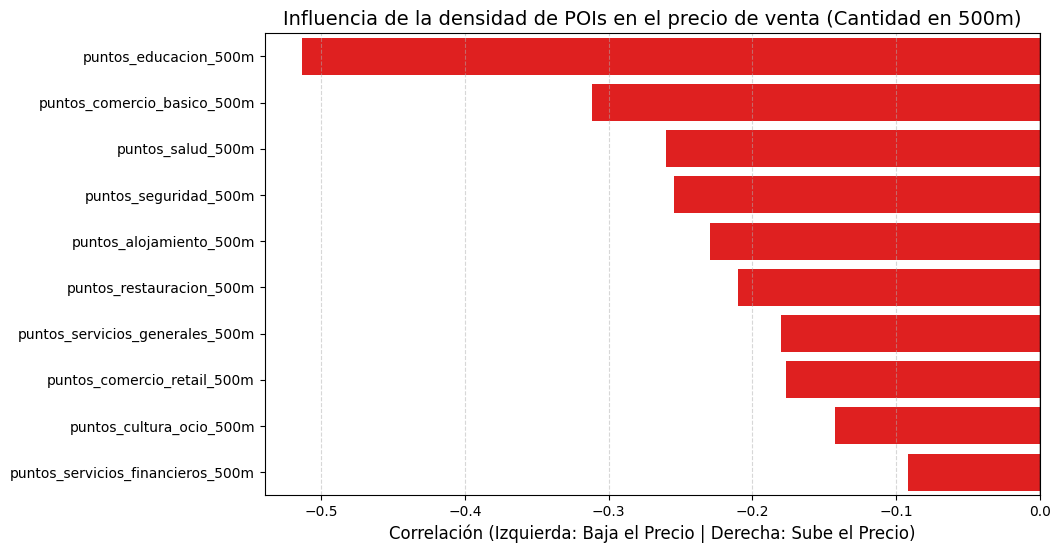

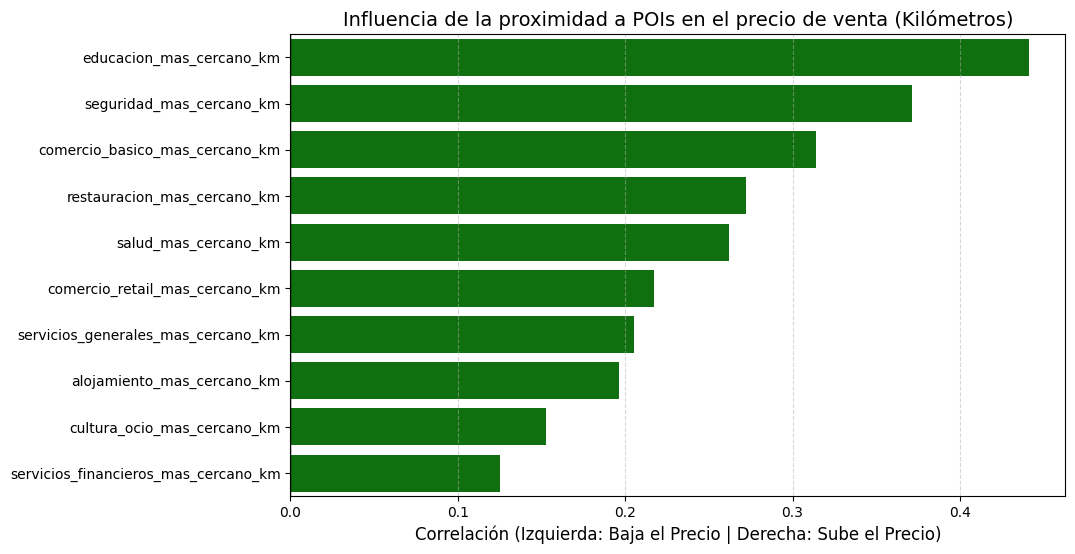

In [35]:
#1. Definimos las palabras clave de POIs
keywords_pois = [
    "salud", "educacion", "comercio", "restauracion", 
    "cultura", "financieros", "generales", "seguridad", "alojamiento"
]

#2. Filtramos y separamos las columnas
col_todas_pois_venta = [col for col in X_train_venta.columns if any(k in col for k in keywords_pois)]

# Grupo A: Cantidad (puntos_..._500m)
cols_cantidad_pois_venta = [col for col in col_todas_pois_venta if "puntos_" in col]

# Grupo B: Distancia (..._mas_cercano_km)
cols_distancia_pois_venta = [col for col in col_todas_pois_venta if "mas_cercano_km" in col]

#3. Generamos los dos gráficos
graficar_subgrupo(
    X_train_venta, y_train_venta, 
    cols_cantidad_pois_venta, 
    "Influencia de la densidad de POIs en el precio de venta (Cantidad en 500m)"
)

graficar_subgrupo(
    X_train_venta, y_train_venta, 
    cols_distancia_pois_venta, 
    "Influencia de la proximidad a POIs en el precio de venta (Kilómetros)"
)

### Conectividad

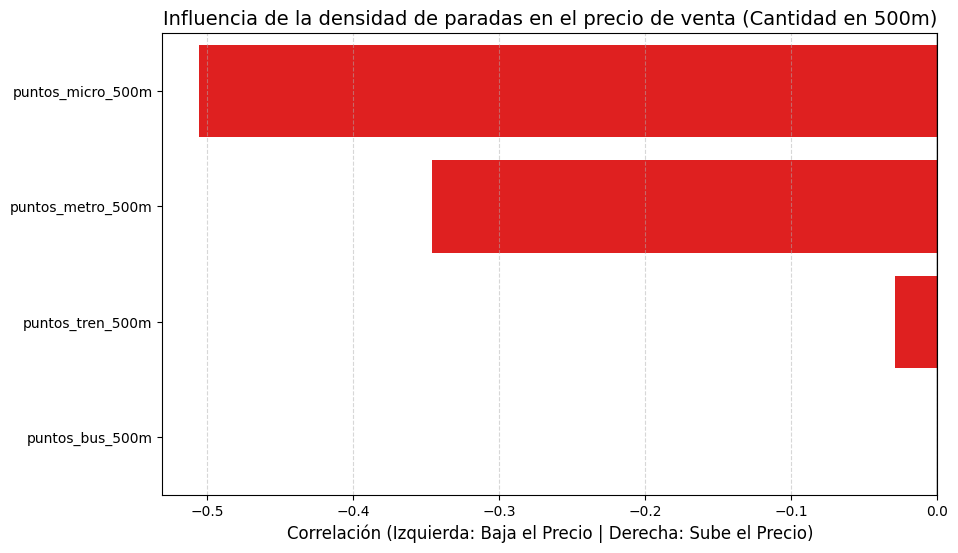

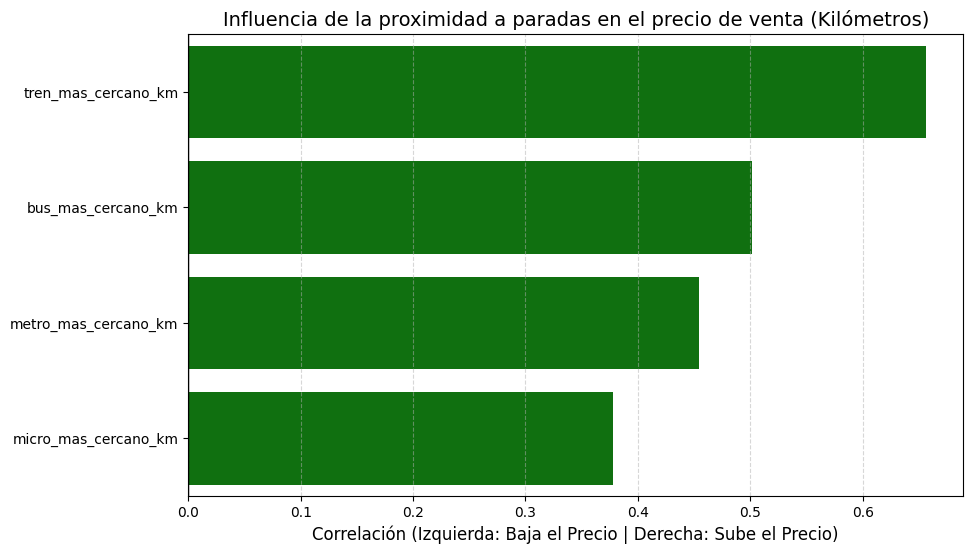

In [36]:
#1. Definimos las palabras clave de conectividad.
keywords_conectividad = ["metro", "micro", "tren", "bus"]

#2. Filtramos y separamos las columnas.
col_todas_conectividad_venta = [col for col in X_train_venta.columns if any(k in col for k in keywords_conectividad)]

#Grupo A: Cantidad.
cols_cantidad_conectividad_venta = [col for col in col_todas_conectividad_venta if "puntos_" in col]

#Grupo B: Distancia.
cols_distancia_conectividad_venta = [col for col in col_todas_conectividad_venta if "mas_cercano_km" in col]

#3. Generamos los dos gráficos.
graficar_subgrupo(
    X_train_venta, y_train_venta, 
    cols_cantidad_conectividad_venta, 
    "Influencia de la densidad de paradas en el precio de venta (Cantidad en 500m)"
)

graficar_subgrupo(
    X_train_venta, y_train_venta, 
    cols_distancia_conectividad_venta, 
    "Influencia de la proximidad a paradas en el precio de venta (Kilómetros)"
)

### Uso de Suelo

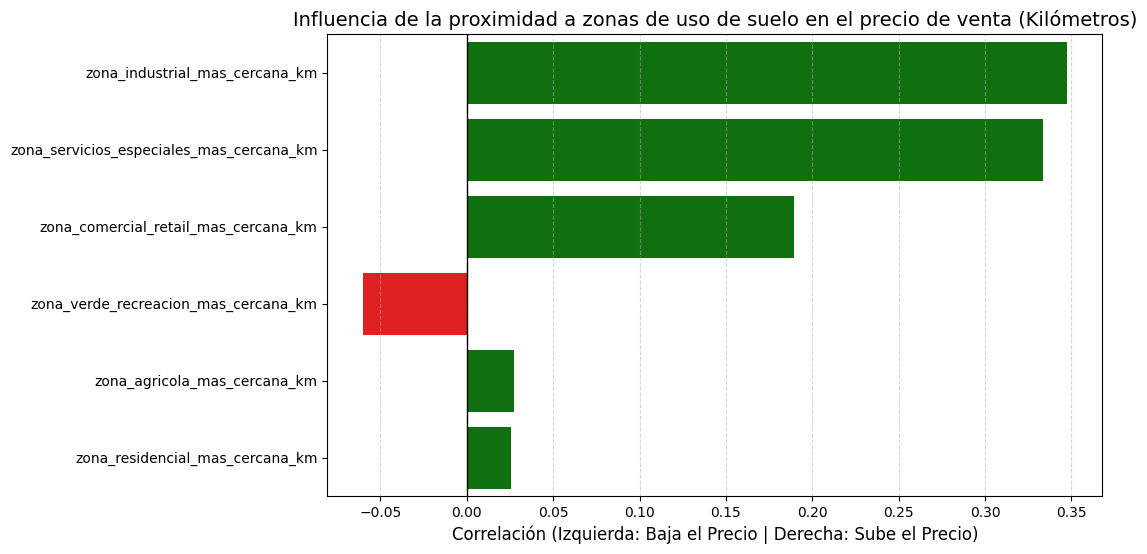

In [37]:
#1. Definimos las palabras clave de uso de suelo.
keywords_zonas = ["zona_"]

#2. Filtramos y separamos las columnas.
col_todas_zonas_venta = [col for col in X_train_venta.columns if any(k in col for k in keywords_zonas)]

#Grupo A: Distancia.
cols_distancia_zonas_venta = [col for col in col_todas_zonas_venta if "_km" in col]

#3. Generamos los dos gráficos.
graficar_subgrupo(
    X_train_venta, y_train_venta, 
    cols_distancia_zonas_venta, 
    "Influencia de la proximidad a zonas de uso de suelo en el precio de venta (Kilómetros)"
)

## Dirección de Influencia - Propiedades en Arriendo

### POIs

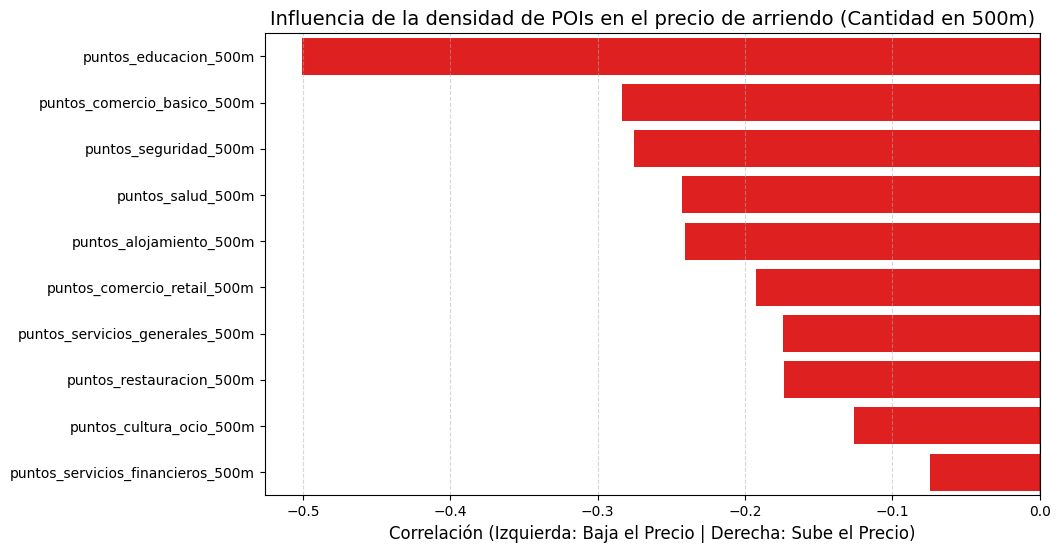

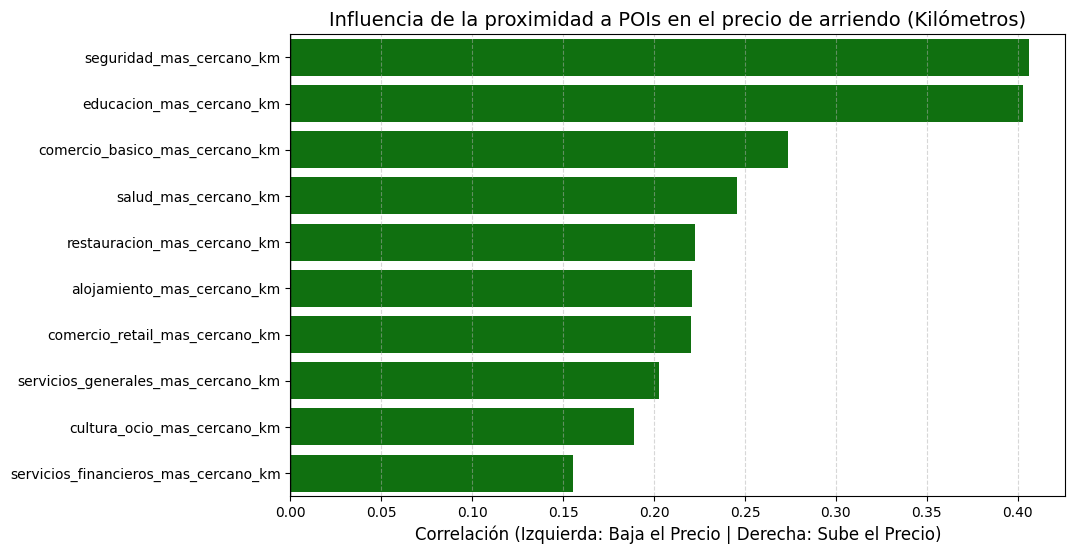

In [38]:
#1. Definimos las palabras clave de POIs
keywords_pois = [
    "salud", "educacion", "comercio", "restauracion", 
    "cultura", "financieros", "generales", "seguridad", "alojamiento"
]

#2. Filtramos y separamos las columnas
col_todas_pois_arriendo = [col for col in X_train_arriendo.columns if any(k in col for k in keywords_pois)]

# Grupo A: Cantidad (puntos_..._500m)
cols_cantidad_pois_arriendo = [col for col in col_todas_pois_arriendo if "puntos_" in col]

# Grupo B: Distancia (..._mas_cercano_km)
cols_distancia_pois_arriendo = [col for col in col_todas_pois_arriendo if "mas_cercano_km" in col]

#3. Generamos los dos gráficos
graficar_subgrupo(
    X_train_arriendo, y_train_arriendo, 
    cols_cantidad_pois_arriendo, 
    "Influencia de la densidad de POIs en el precio de arriendo (Cantidad en 500m)"
)

graficar_subgrupo(
    X_train_arriendo, y_train_arriendo, 
    cols_distancia_pois_arriendo, 
    "Influencia de la proximidad a POIs en el precio de arriendo (Kilómetros)"
)

### Conectividad

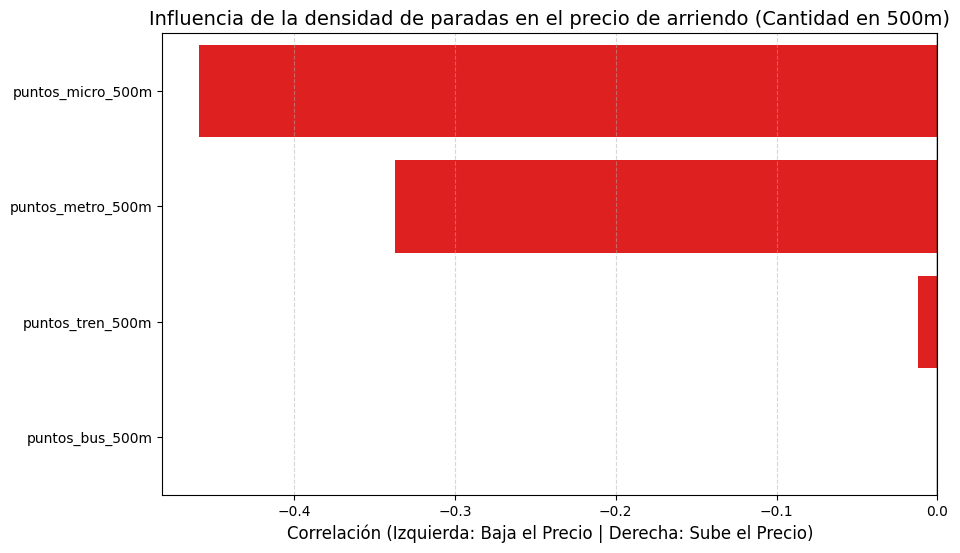

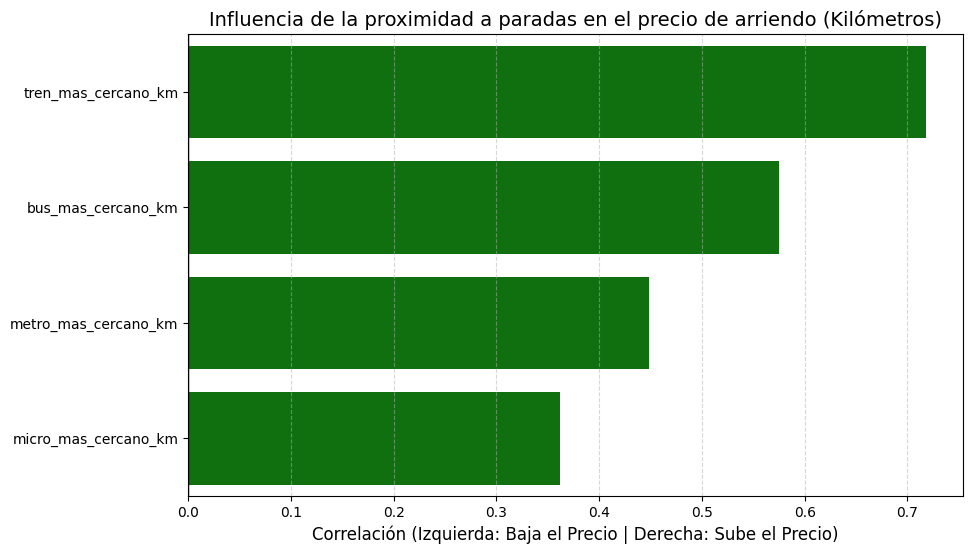

In [39]:
#1. Definimos las palabras clave de conectividad.
keywords_conectividad = ["metro", "micro", "tren", "bus"]

#2. Filtramos y separamos las columnas.
col_todas_conectividad_arriendo = [col for col in X_train_arriendo.columns if any(k in col for k in keywords_conectividad)]

#Grupo A: Cantidad.
cols_cantidad_conectividad_arriendo = [col for col in col_todas_conectividad_arriendo if "puntos_" in col]

#Grupo B: Distancia.
cols_distancia_conectividad_arriendo = [col for col in col_todas_conectividad_arriendo if "mas_cercano_km" in col]

#3. Generamos los dos gráficos.
graficar_subgrupo(
    X_train_arriendo, y_train_arriendo, 
    cols_cantidad_conectividad_arriendo, 
    "Influencia de la densidad de paradas en el precio de arriendo (Cantidad en 500m)"
)

graficar_subgrupo(
    X_train_arriendo, y_train_arriendo, 
    cols_distancia_conectividad_arriendo, 
    "Influencia de la proximidad a paradas en el precio de arriendo (Kilómetros)"
)

### Uso de Suelo

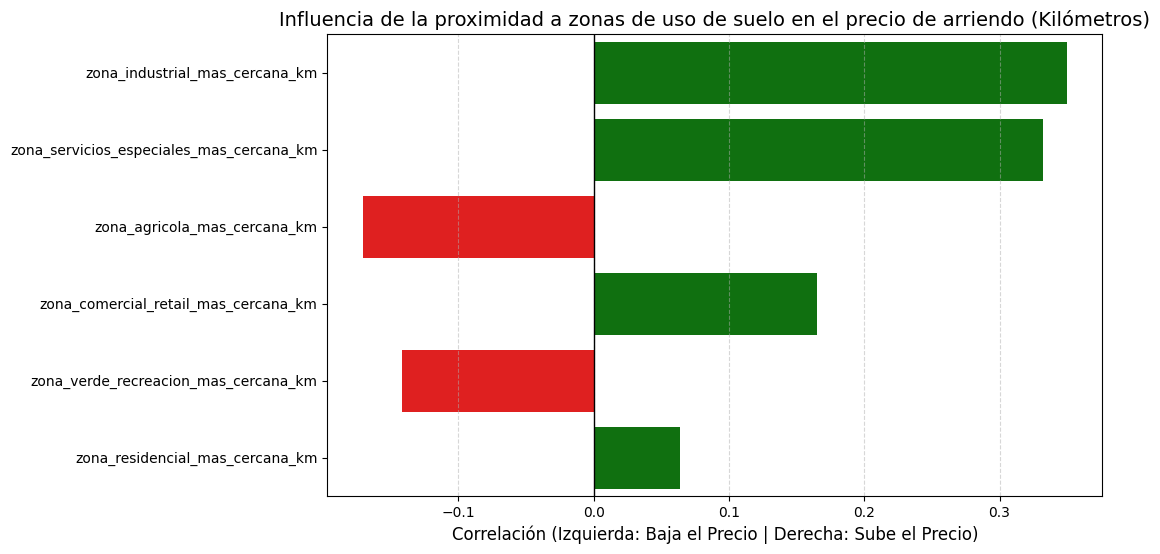

In [40]:
#1. Definimos las palabras clave de uso de suelo.
keywords_zonas = ["zona_"]

#2. Filtramos y separamos las columnas.
col_todas_zonas_arriendo = [col for col in X_train_arriendo.columns if any(k in col for k in keywords_zonas)]

#Grupo A: Distancia.
cols_distancia_zonas_arriendo = [col for col in col_todas_zonas_arriendo if "_km" in col]

#3. Generamos los dos gráficos.
graficar_subgrupo(
    X_train_arriendo, y_train_arriendo, 
    cols_distancia_zonas_arriendo, 
    "Influencia de la proximidad a zonas de uso de suelo en el precio de arriendo (Kilómetros)"
)